# Pandas Lightning Talk Demo
We will go over how to use pandas to import and process data related to the novel COVID-19 virus

The first step is to import Pandas
Also include matplotlib inline to show graphs in Pandas

Copyright Nick Piacente, Ziam Ghaznavi, David Cayll

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# formatting for Jupyter Notebook
pd.options.display.max_columns = None
pd.options.display.max_rows = None


## Data Source
Johns Hopkins University is compiling COVID-19 data from multiple sources daily.  They publish the raw data on their Github page.  We can find the most recent data at the link below:

https://github.com/CSSEGISandData/COVID-19

We can import the data related to global deaths, confirmed cases, and recovered cases using these links to their data

In [2]:
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

## Bring in data
We can bring in data using the read_csv method.  The data is now contained in a Pandas DataFrame 


In [3]:
Deaths = pd.read_csv(deaths_url)
Confirmed = pd.read_csv(confirmed_url)

In [4]:
type(Deaths)

# also works
#type(confirmed)

pandas.core.frame.DataFrame

In [5]:
Deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,4,4,4
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5,5,6,8,10
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19,21,25,26,29
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,3
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2,2,2,2,3,3,4,4,4,6,8,9,13,18
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,2,2,2,2,2,2,2,4,5,5,6,6,6,6,7,7,7,7,8


### Let's find the most recent date of data

In [6]:
mostRecentDate = Deaths.columns[-1] # gets the columns of the matrix

In [7]:
mostRecentDate

'3/28/20'

### The (minimally processed) DataFrame can be seen below
Sorted by confirmed count max at the latest date

In [8]:
# formatting for Jupyter Notebook
pd.options.display.max_columns = 13
pd.options.display.max_rows = 13

# try 'confirmed', 'deaths'
dataName = 'Deaths'

data = eval(dataName)

# show the data frame
data.sort_values(by=mostRecentDate, ascending = False).head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,...,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20
137,NaN,Italy,43.0000,12.0000,0,0,...,6077,6820,7503,8215,9134,10023
201,NaN,Spain,40.0000,-4.0000,0,0,...,2311,2808,3647,4365,5138,5982
62,Hubei,China,30.9756,112.2707,17,17,...,3153,3160,3163,3169,3174,3177
133,NaN,Iran,32.0000,53.0000,0,0,...,1812,1934,2077,2234,2378,2517
116,NaN,France,46.2276,2.2137,0,0,...,860,1100,1331,1696,1995,2314
225,NaN,US,37.0902,-95.7129,0,0,...,557,706,942,1209,1581,2026
223,NaN,United Kingdom,55.3781,-3.4360,0,0,...,335,422,465,578,759,1019
169,NaN,Netherlands,52.1326,5.2913,0,0,...,213,276,356,434,546,639
120,NaN,Germany,51.0000,9.0000,0,0,...,123,157,206,267,342,433
23,NaN,Belgium,50.8333,4.0000,0,0,...,88,122,178,220,289,353


In [9]:
countryFrames = data.drop(['Lat','Long'], axis=1)

In [10]:
# save this index variable to save the order.
index = countryFrames.columns.drop(['Province/State']) 

# Let's process the DataFrame:
# Show confirmed cases by date for the worst 20 Countries

Adding Filters can make the data more meaningful. 
We won't use the Lat/Long data, and need to group the data by country

### The pivot_table method will eliminate duplicate entries from Countries with more than one city

In [11]:
# unintended consequence of incorrect sorting and date order
countryFrames.pivot_table(index = 'Country/Region', aggfunc = sum)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Country/Region,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,...,0,0,0,0,0,0
Albania,0,0,0,0,0,0,...,0,0,0,0,0,0
Algeria,0,0,0,0,0,0,...,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,...,0,0,0,0,0,0
Angola,0,0,0,0,0,0,...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0,0,0,0,0,0,...,0,0,0,0,0,0
Vietnam,0,0,0,0,0,0,...,0,0,0,0,0,0
West Bank and Gaza,0,0,0,0,0,0,...,0,0,0,0,0,0


In [12]:
# formatting using a variety of methods to process and sort data
finalFrame = countryFrames.transpose().reindex(index).transpose().set_index('Country/Region').sort_values(by=mostRecentDate, ascending=False).transpose()

In [13]:
finalFrame

Country/Region,Italy,Spain,China,Iran,France,US,...,France,Fiji,Ethiopia,Eswatini,Eritrea,MS Zaandam
1/22/20,0,0,17,0,0,0,...,0,0,0,0,0,0
1/23/20,0,0,17,0,0,0,...,0,0,0,0,0,0
1/24/20,0,0,24,0,0,0,...,0,0,0,0,0,0
1/25/20,0,0,40,0,0,0,...,0,0,0,0,0,0
1/26/20,0,0,52,0,0,0,...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3/24/20,6820,2808,3160,1934,1100,706,...,0,0,0,0,0,0
3/25/20,7503,3647,3163,2077,1331,942,...,0,0,0,0,0,0
3/26/20,8215,4365,3169,2234,1696,1209,...,0,0,0,0,0,0
3/27/20,9134,5138,3174,2378,1995,1581,...,0,0,0,0,0,0


## We can plot the data for the top 20 countries

In [14]:
#try other amounts
topAmount = 20

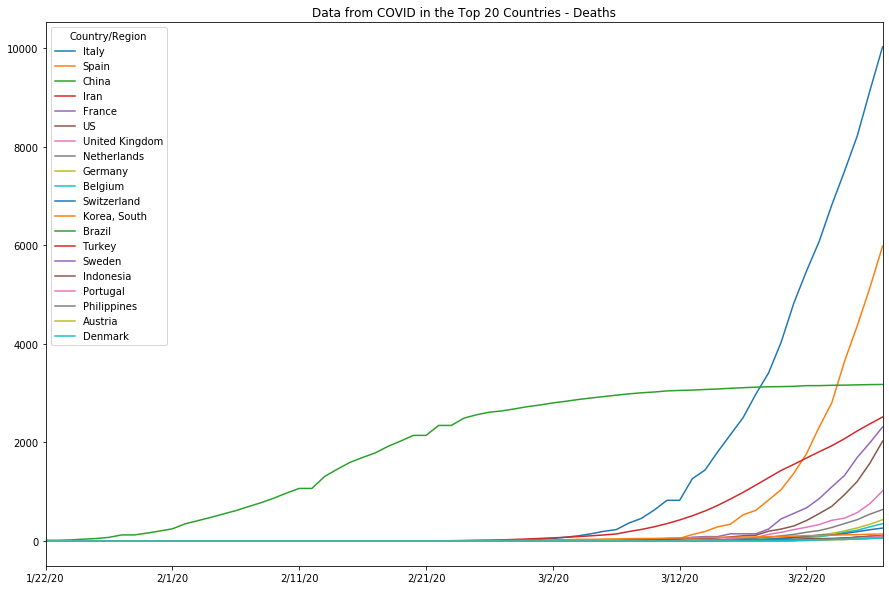

In [15]:
finalFrame.iloc[:, :topAmount].plot(figsize=(15, 10), title = "Data from COVID in the Top {} Countries - {}".format(topAmount,dataName))

# Lets take a look at the most recent US Data 
Existing cases by day are tracked in a different CSV, labeled : 'MM-DD-YYYY.csv' in a different directory from JHU

In [16]:
dateForURL = '0' + mostRecentDate.replace('/','-')+ '20.csv' # will only work for a while
mostRecent_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + dateForURL
mostRecentFrame = pd.read_csv(mostRecent_url)

In [17]:
mostRecentFrame

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-28 23:05:37,34.223334,-82.461707,3,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-28 23:05:37,30.295065,-92.414197,9,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-28 23:05:37,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-28 23:05:37,43.452658,-116.241552,76,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-28 23:05:37,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3425,NaN,NaN,NaN,Venezuela,2020-03-28 23:05:25,6.423800,-66.589700,119,2,39,78,Venezuela
3426,NaN,NaN,NaN,Vietnam,2020-03-28 23:05:25,14.058324,108.277199,174,0,21,153,Vietnam
3427,NaN,NaN,NaN,West Bank and Gaza,2020-03-28 23:05:25,31.952200,35.233200,98,1,18,79,West Bank and Gaza
3428,NaN,NaN,NaN,Zambia,2020-03-28 23:05:25,-13.133897,27.849332,28,0,0,28,Zambia


# More Filtering

In [18]:
# filters the dataframe to the criteria below.
state = 'Texas' # try others
data = 'Confirmed' # try 'Deaths', 'Recovered', and 'Active'

frameToPlot = mostRecentFrame.sort_values(by=data, ascending = False).copy()
frameToPlot.rename(columns = {'Combined_Key':'City','Admin2':'County'}, inplace = True)

selectedState = frameToPlot['Province_State'] == (state)
selectedCountry = frameToPlot['Country_Region'] == 'US'


In [19]:
# This creates a true/false table which filters the data
selectedState & selectedCountry

3336    False
3404    False
3205    False
3317    False
3313    False
        ...  
2481    False
1115    False
2479    False
1781    False
1715    False
Length: 3430, dtype: bool

In [20]:
frameToPlot[selectedState]

,FIPS,County,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,City
1211,48201.0,Harris,Texas,US,2020-03-28 23:05:37,29.858649,-95.393395,445,2,0,0,"Harris, Texas, US"
712,48113.0,Dallas,Texas,US,2020-03-28 23:05:37,32.766706,-96.777961,439,9,0,0,"Dallas, Texas, US"
2823,48453.0,Travis,Texas,US,2020-03-28 23:05:37,30.334320,-97.785356,179,1,0,0,"Travis, Texas, US"
768,48121.0,Denton,Texas,US,2020-03-28 23:05:37,33.205219,-97.116912,148,2,0,0,"Denton, Texas, US"
2765,48439.0,Tarrant,Texas,US,2020-03-28 23:05:37,32.771438,-97.291016,128,1,0,0,"Tarrant, Texas, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2542,48413.0,Schleicher,Texas,US,2020-03-28 23:05:37,30.897406,-100.538484,0,0,0,0,"Schleicher, Texas, US"
707,48111.0,Dallam,Texas,US,2020-03-28 23:05:37,36.277872,-102.602073,0,0,0,0,"Dallam, Texas, US"
765,48119.0,Delta,Texas,US,2020-03-28 23:05:37,33.385709,-95.669211,0,0,0,0,"Delta, Texas, US"
2475,48399.0,Runnels,Texas,US,2020-03-28 23:05:37,31.831434,-99.976161,0,0,0,0,"Runnels, Texas, US"


# Integration with matplotlib
Pandas plots can integrate easily with matplotlib
The following matplot figure is generated with values straight from dataFrames

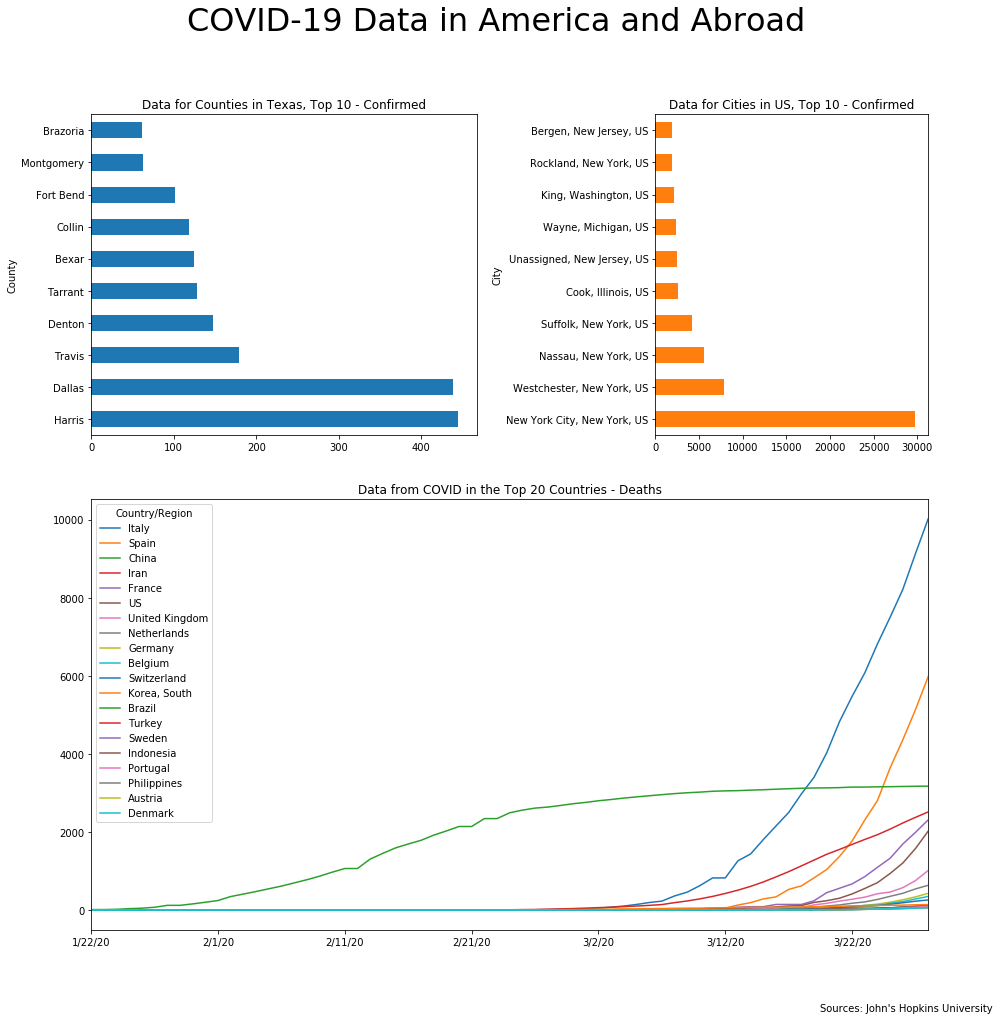

In [21]:
####################################
######  MAKE A PRETTY PICTURE ######
####################################

fig = plt.figure(figsize = (15,15))
fig.suptitle('COVID-19 Data in America and Abroad', size = 32)
grid_size = (15,15)

# Place A Title On The Figure
fig.text(x=0.8, y=0.05, s='Sources: John\'s Hopkins University', horizontalalignment='left')
# Overlay multiple plots onto the same axis, which spans 1 entire column of the figure
bottom_ax = plt.subplot2grid(grid_size, (7,0), colspan=15, rowspan=8)
upper_left_ax = plt.subplot2grid(grid_size, (0,0), colspan=7, rowspan=6)
upper_right_ax = plt.subplot2grid(grid_size, (0,10), colspan=7, rowspan=6)

frameToPlot[selectedState][:10].plot(ax = upper_left_ax, kind='barh', x = 'County', y = [data], title = 'Data for Counties in {}, Top 10 - {}'.format(state, data), legend = False) 
frameToPlot[selectedCountry][:10].plot(ax = upper_right_ax, kind='barh', x = 'City', y = [data], title = 'Data for Cities in US, Top 10 - {}'.format(data), color = 'C1', legend = False) 
finalFrame.iloc[:, :topAmount].plot(ax=bottom_ax, title = "Data from COVID in the Top {} Countries - {}".format(topAmount,dataName))